# 유동인구 기반 코로나 데이터셋 분석

장재원(202055144)

### 분석내용 요약

코로나 사태를 뉴스로 접하며 유동인구수와 확진자수의 상관관계에 있을 것이라고 예상했고, 저는 SKT 빅데이터 허브에서제공된 유동인구 데이터를 이용하여 유동인구수와 확진자수사이의 상관관계를 분석했습니다. 또한,https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description 의 코로나데이터셋 Policy파일을 통해, 사회적거리두기 정책의 실효성을 알아보고자 했습니다.

지역별 한달 평균 유동인구수와 코로나 확진자수분석 결과
지역별 평균 유동인구수와 코로나 확진자수는 그 상관관계가 크지않고
오히려 다른 변수들에 의해 크게 영향을 받는 것으로 생각됩니다.

서울시내 코로나 누적확진자수와 서울시내 유동인구수를 분석결과
코로나확진자수의 증가는 서울시내 유동인구의 큰 영향을 주지 못한것으로 생각됩니다.

사회적거리두기 정책 실행날짜를 기준으로 서울시내 일별 확진자수, 유동인구를 분석한 결과
회적거리두기 정책은 코로나환자수를 일시적으로 감소시키는데 효과가 있는것으로 생각됩니다.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [3]:
#파일 불러오기
policy = pd.read_csv('Policy.csv')
floating2 = pd.read_csv('floating/Floating_Population_2002.csv')
floating3 = pd.read_csv('floating/Floating_Population_2003.csv')
floating4 = pd.read_csv('floating/Floating_Population_2004.csv')
floating5 = pd.read_csv('floating/Floating_Population_2005.csv')
floating6 = pd.read_csv('floating/Floating_Population_2006.csv')

In [4]:
confirmed = pd.read_csv('floating/real_eng.csv',encoding='CP949')

In [5]:
#유동인구량 파일 붙임
floating = pd.concat([floating2, floating3, floating4, floating5, floating6])
floating

,date,Time(unit=1hour),Age(unit=10years_old),sex,Province,city,Floating_population,Time(unit=1hour)(1Time(unit=1hour)단위)
0,20200201,0.0,60,Female,Seoul,Eunpyeong-gu,29130,NaN
1,20200201,0.0,60,Female,Seoul,Jungnang-gu,24880,NaN
2,20200201,0.0,70,Male,Seoul,Dongdaemun-gu,14740,NaN
3,20200201,1.0,40,Female,Seoul,Yangcheon-gu,43140,NaN
4,20200201,2.0,40,Male,Seoul,Dobong-gu,25320,NaN
...,...,...,...,...,...,...,...,...
215995,20200630,22.0,60,Male,Seoul,Eunpyeong-gu,22910,NaN
215996,20200630,22.0,70,Female,Seoul,Gangbuk-gu,18330,NaN
215997,20200630,23.0,20,Female,Seoul,Seocho-gu,30840,NaN
215998,20200630,23.0,60,Male,Seoul,Eunpyeong-gu,23050,NaN


In [6]:
floating.head()

,date,Time(unit=1hour),Age(unit=10years_old),sex,Province,city,Floating_population,Time(unit=1hour)(1Time(unit=1hour)단위)
0,20200201,0.0,60,Female,Seoul,Eunpyeong-gu,29130,NaN
1,20200201,0.0,60,Female,Seoul,Jungnang-gu,24880,NaN
2,20200201,0.0,70,Male,Seoul,Dongdaemun-gu,14740,NaN
3,20200201,1.0,40,Female,Seoul,Yangcheon-gu,43140,NaN
4,20200201,2.0,40,Male,Seoul,Dobong-gu,25320,NaN


In [7]:
#서울에서 일별 평균 유동인구량
f =floating.groupby('date')[['Floating_population']].mean()
f.head()

,Floating_population
date,
20200201,27145.294444
20200202,26824.380556
20200203,27886.648611
20200204,27889.215278
20200205,27880.240278


In [8]:
#2월 1일부터 6월30일까지 군구별 평균 이동량
g= floating.groupby('city')[['Floating_population']].mean()
g.head()

,Floating_population
city,
Dobong-gu,19953.820295
Dongdaemun-gu,24267.343402
Dongjak-gu,26052.310226
Eunpyeong-gu,27955.616648
Gangbuk-gu,19824.457127


In [9]:
#유동인구수 요약
sum_float= floating.drop(['Time(unit=1hour)','Age(unit=10years_old)','sex','Province','Time(unit=1hour)(1Time(unit=1hour)단위)'],axis=1)
sum_float

,date,city,Floating_population
0,20200201,Eunpyeong-gu,29130
1,20200201,Jungnang-gu,24880
2,20200201,Dongdaemun-gu,14740
3,20200201,Yangcheon-gu,43140
4,20200201,Dobong-gu,25320
...,...,...,...
215995,20200630,Eunpyeong-gu,22910
215996,20200630,Gangbuk-gu,18330
215997,20200630,Seocho-gu,30840
215998,20200630,Eunpyeong-gu,23050


In [10]:
#일별 지역별 평균유동인구
daily_float= sum_float.groupby(['date','city'])[['Floating_population']].mean()
daily_float.head()

Floating_population
date     city                              
20200201 Dobong-gu             20940.381944
         Dongdaemun-gu         24316.875000
         Dongjak-gu            27070.243056
         Eunpyeong-gu          29592.083333
         Gangbuk-gu            20717.013889

In [11]:
#monthly_float2_df (2 = 월)
#2월 지역별 평균유동인구 추이
monthly_float2=daily_float.loc[20200201:20200229].unstack().mean()
#2월 지역별 평균유동인구 추이의 데이터프레임 변환
monthly_float2_df= monthly_float2.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float2_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#3월 지역별 평균유동인구 추이
monthly_float3=daily_float.loc[20200301:20200331].unstack().mean()
#3월 지역별 유동인구 추이의 데이터프레임 변환
monthly_float3_df= monthly_float3.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float3_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#4월 지역별 평균유동인구 추이
monthly_float4=daily_float.loc[20200401:20200430].unstack().mean()
#4월 지역별 평균유동인구 추이의 데이터프레임 변환
monthly_float4_df= monthly_float4.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float4_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#5월 지역별 평균유동인구 추이
monthly_float5=daily_float.loc[20200501:20200531].unstack().mean()
#5월 지역별 평균유동인구 추이의 데이터프레임 변환
monthly_float5_df= monthly_float5.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float5_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

#6월 지역별 평균유동인구 추이
monthly_float6=daily_float.loc[20200601:20200630].unstack().mean()
#6월 지역별 평균유동인구 추이의 데이터프레임 변환
monthly_float6_df= monthly_float6.to_frame().reset_index().drop(['level_0'],axis=1)
monthly_float6_df.rename(columns = {'city':'city', 0:'Floating_population'}, inplace = True)

monthly_float6_df.head()

,city,Floating_population
0,Dobong-gu,19653.355324
1,Dongdaemun-gu,24214.483796
2,Dongjak-gu,25890.785880
3,Eunpyeong-gu,27482.921296
4,Gangbuk-gu,19472.200231


In [12]:
confirmed.head(1)

,number,확진일,확진일.1,확진일1,date,환자번호,국적,환자정보,city,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,15356,12.21.,12-21-,12-21,2020-12-21,NaN,NaN,NaN,Eunpyeong-gu,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-22 10:35,2020-12-22 10:35,Y


In [13]:
#서울시 지역별 확진자, 칼럼 요약, number= 환자번호
sum_confirmed1=confirmed.drop(['환자번호','확진일','확진일.1','확진일1','국적','환자정보','여행력','접촉력','조치사항','상태','이동경로','등록일','수정일','노출여부'], axis=1).iloc[:15356]
sum_confirmed=sum_confirmed1.set_index('date').sort_index().loc['2020-02-01':'2020-06-31'].reset_index()
sum_confirmed.tail()

,date,number,city
1310,2020-06-30,1317,Gwanak-gu
1311,2020-06-30,1316,Gwanak-gu
1312,2020-06-30,1315,Geumcheon-gu
1313,2020-06-30,1318,Gwanak-gu
1314,2020-06-30,1314,Mapo-gu


In [14]:
#2월1일부터 6월31일까지 일자별, 지역별 확진자수 , number = 확진자수
confirmed_data = sum_confirmed.groupby(['date','city'])[['number']].count()
confirmed_data

number
date       city                   
2020-02-16 Jongno-gu             2
2020-02-19 Jongno-gu             1
           Seongdong-gu          1
2020-02-2- the others            1
2020-02-20 Gangnam-gu            1
...                            ...
2020-06-30 Geumcheon-gu          1
           Gwanak-gu             4
           Mapo-gu               1
           Seocho-gu             1
           Yeongdeungpo-gu       2

[826 rows x 1 columns]

In [15]:
#monthly_confirmed2 (2=월)
#2월 확진자수
monthly_confirmed2 = confirmed_data.loc['2020-02-01':'2020-02-29'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed2.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#3월 확진자수
monthly_confirmed3 = confirmed_data.loc['2020-03-01':'2020-03-31'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed3.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#4월 확진자수
monthly_confirmed4 = confirmed_data.loc['2020-04-01':'2020-04-30'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed4.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#5월 확진자수
monthly_confirmed5 = confirmed_data.loc['2020-05-01':'2020-05-31'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed5.rename(columns = {'city':'city', 0:'number'}, inplace = True)

#6월 확진자수
monthly_confirmed6 = confirmed_data.loc['2020-06-01':'2020-06-30'].unstack().sum().to_frame().reset_index().drop(['level_0'],axis=1)
monthly_confirmed6.rename(columns = {'city':'city', 0:'number'}, inplace = True)

monthly_confirmed6.head()

,city,number
0,Dobong-gu,43.0
1,Dongdaemun-gu,4.0
2,Dongjak-gu,13.0
3,Eunpyeong-gu,18.0
4,Gangbuk-gu,10.0


In [16]:
#2월부터 6월까지 각월 총인구이동량과 확진자수
month2 = monthly_float2_df.combine_first(monthly_confirmed2).fillna(0).set_index('city')
month3 = monthly_float3_df.combine_first(monthly_confirmed3).fillna(0).set_index('city').drop('the others')
month4 = monthly_float4_df.combine_first(monthly_confirmed4).fillna(0).set_index('city')
month5 = monthly_float5_df.combine_first(monthly_confirmed5).fillna(0).set_index('city').drop('the others')
month6 = monthly_float6_df.combine_first(monthly_confirmed6).fillna(0).set_index('city').drop('the others')
month6.head()

,Floating_population,number
city,,
Dobong-gu,19653.355324,43.0
Dongdaemun-gu,24214.483796,4.0
Dongjak-gu,25890.785880,13.0
Eunpyeong-gu,27482.921296,18.0
Gangbuk-gu,19472.200231,10.0


# 확진자와 유동인구 상관관계

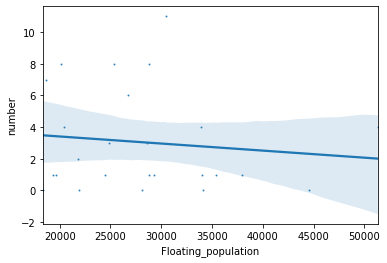

In [17]:
#2월 확진자와 유동인구의 상관관계
sns.regplot(data = month2, x = 'Floating_population', y = 'number', scatter_kws = {'s':1})

In [18]:
month2.corr()

,Floating_population,number
Floating_population,1.000000,-0.115482
number,-0.115482,1.000000


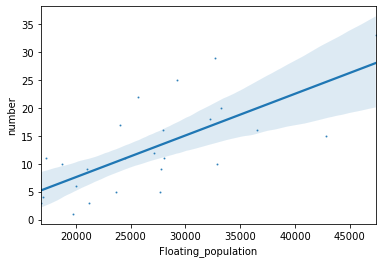

In [19]:
#3월 확진자와 유동인구의 상관관계
sns.regplot(data = month3, x = 'Floating_population', y = 'number', scatter_kws = {'s':1})

In [20]:
month3.corr()

,Floating_population,number
Floating_population,1.000000,0.701544
number,0.701544,1.000000


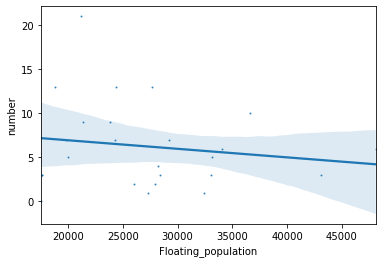

In [21]:
#4월 확진자와 유동인구의 상관관계
sns.regplot(data = month4, x = 'Floating_population', y = 'number', scatter_kws = {'s':1})

In [22]:
month4.corr()

,Floating_population,number
Floating_population,1.00000,-0.15556
number,-0.15556,1.00000


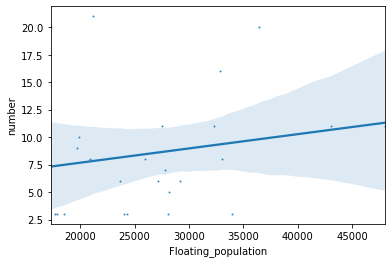

In [23]:
#5월 확진자와 유동인구의 상관관계
sns.regplot(data = month5, x = 'Floating_population', y = 'number', scatter_kws = {'s':1})

In [24]:
month5.corr()

,Floating_population,number
Floating_population,1.000000,0.182849
number,0.182849,1.000000


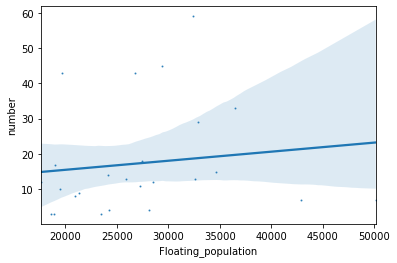

In [25]:
#6월 확진자와 유동인구의 상관관계
sns.regplot(data = month6, x = 'Floating_population', y = 'number', scatter_kws = {'s':1})

In [26]:
month6.corr()

,Floating_population,number
Floating_population,1.000000,0.132728
number,0.132728,1.000000


각 월별로 상관관계가 모두 고르지 않고 변동이 심하여 상관관계가 미미하다고 판단된다.

## 지역별 한달 평균 유동인구수와 코로나 확진자수 그래프
가시적인 데이터를 통해 통계량을 알아보자.

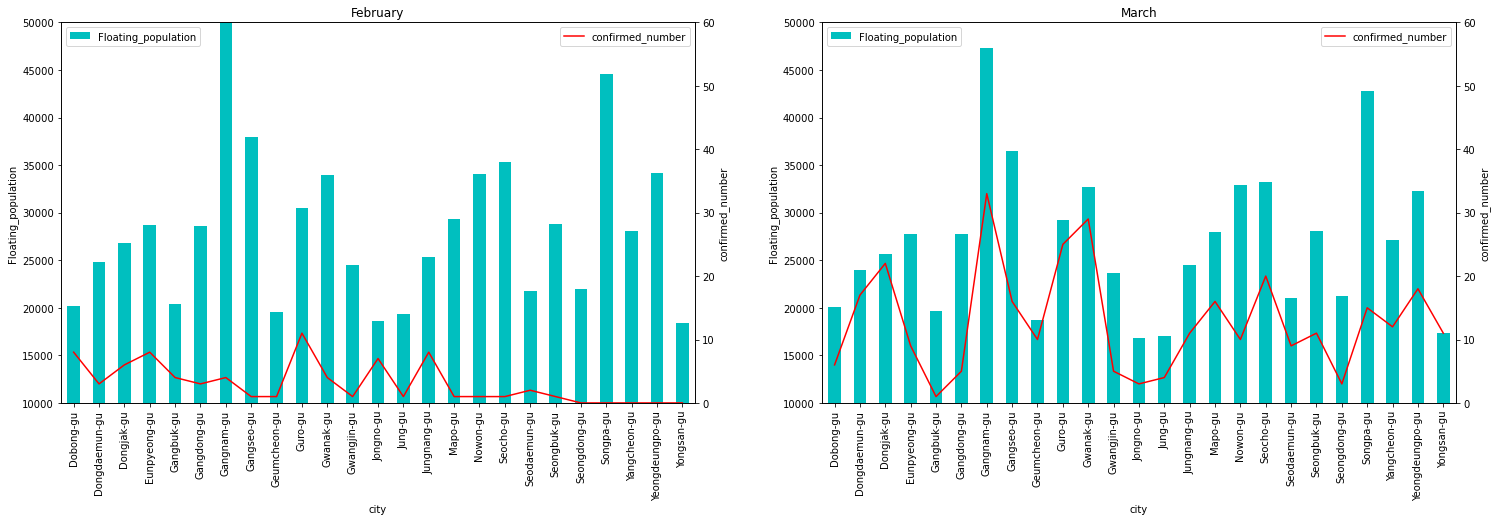

In [27]:
#2월부터 6월까지 평균 유동인구수와 확진자 수 분석
fig, axes = plt.subplots(1,2, figsize= (25, 7))
#2월
month2["Floating_population"].plot(ax=axes[0], kind = 'bar', ylim = [10000, 50000], color ='c')
axes01 = axes[0].twinx()
month2["number"].plot(ax= axes01, kind = 'line', color = 'r', ylim = [0,60],label='confirmed_number')
axes[0].set_title('February')
axes[0].set_ylabel('Floating_population')
axes01.set_ylabel('confirmed_number')
axes[0].legend(loc='upper left')
plt.legend()
#3월
month3["Floating_population"].plot(ax=axes[1], kind = 'bar', ylim = [10000, 50000],color ='c')
axes11 = axes[1].twinx()
month3["number"].plot(ax= axes11, kind = 'line', color = 'r', ylim = [0,60],label='confirmed_number')
axes[1].set_title('March')
axes[1].set_ylabel('Floating_population')
axes11.set_ylabel('confirmed_number')
axes[1].legend(loc='upper left')
plt.legend()

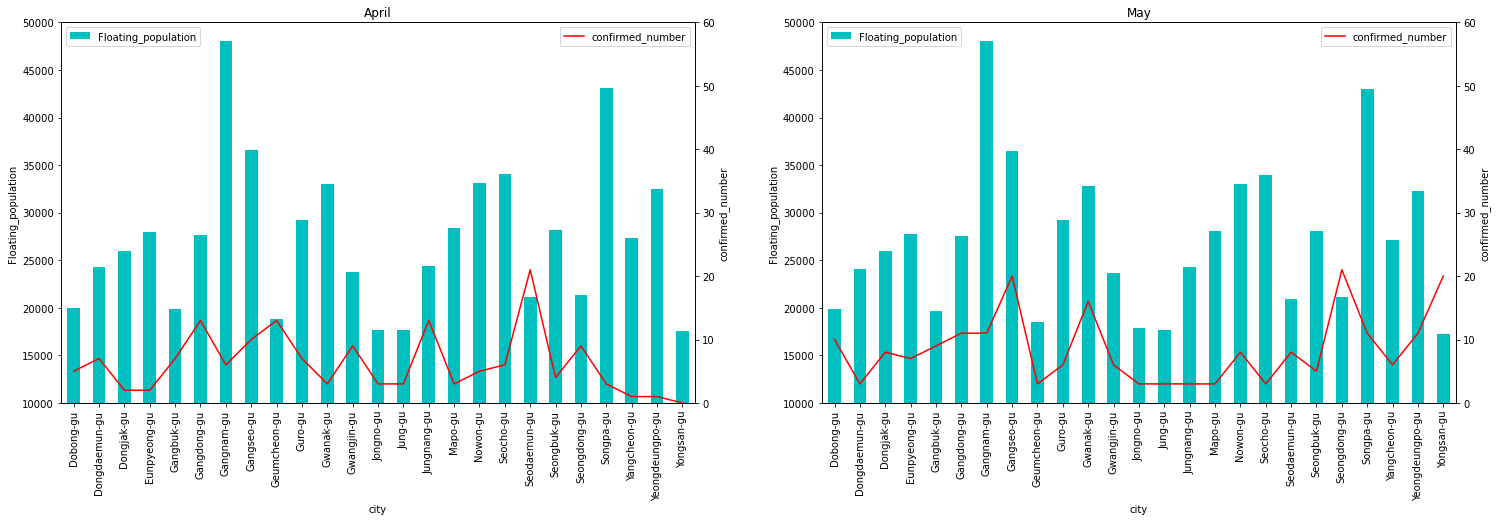

In [28]:
fig, axes = plt.subplots(1,2, figsize= (25, 7))
#4월
month4["Floating_population"].plot(ax=axes[0], kind = 'bar', ylim = [10000, 50000],color ='c',label= 'Floating_population')
axes01 = axes[0].twinx()
month4["number"].plot(ax= axes01, kind = 'line', color = 'r', ylim = [0,60],label='confirmed_number')
axes[0].set_title('April')
axes[0].set_ylabel('Floating_population')
axes01.set_ylabel('confirmed_number')
axes[0].legend(loc='upper left')
plt.legend()
#5월
month5["Floating_population"].plot(ax=axes[1], kind = 'bar',ylim = [10000, 50000],color ='c',label= 'Floating_population')
axes11 = axes[1].twinx()
month5["number"].plot(ax= axes11, kind = 'line', color = 'r',ylim = [0,60],label='confirmed_number')
axes[1].set_title('May')
axes[1].set_ylabel('Floating_population')
axes11.set_ylabel('confirmed_number')
axes[1].legend(loc='upper left')
plt.legend()

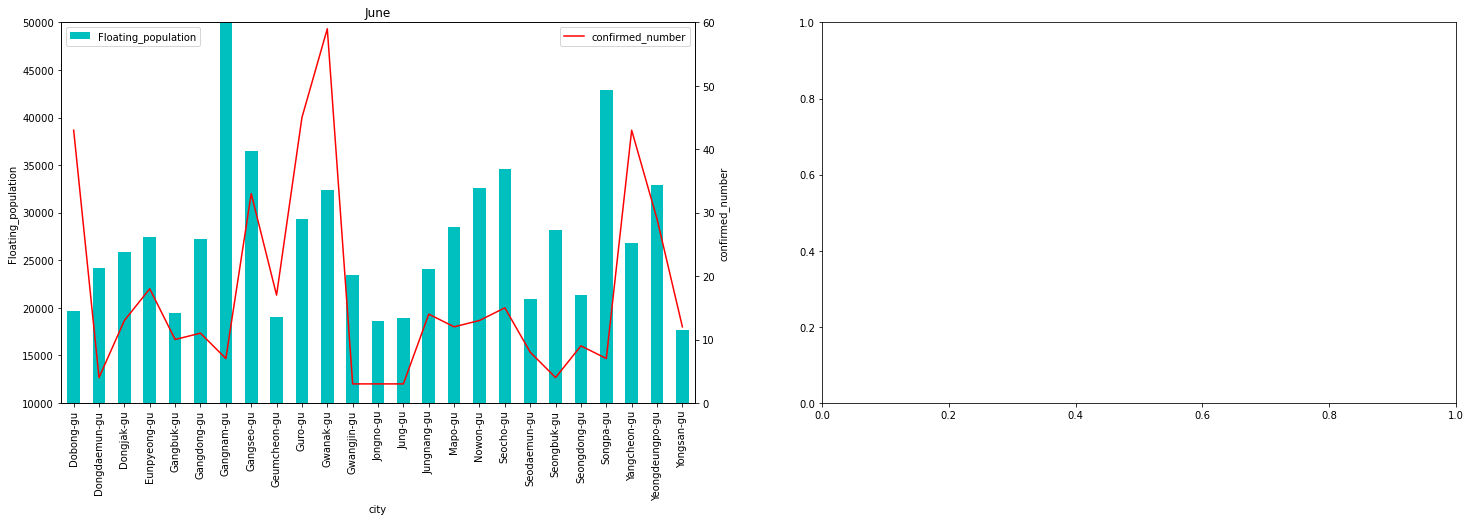

In [29]:
fig, axes = plt.subplots(1,2,figsize= (25, 7))

#6월
month6["Floating_population"].plot(ax=axes[0], kind = 'bar',ylim = [10000, 50000],color ='c', label= 'Floating_population')
axes01 = axes[0].twinx()
month6["number"].plot(ax= axes01, kind = 'line', color = 'r',ylim = [0,60], label='confirmed_number')
axes[0].set_title('June')
axes[0].set_ylabel('Floating_population')
axes01.set_ylabel('confirmed_number')
axes[0].legend(loc='upper left')
plt.legend()

## 분석결과(지역별 한달 평균 유동인구수와 코로나 확진자수)

2월,3월,4월,5월,6월의 지역별 평균 유동인구수와 코로나 확진자수를 분석했습니다.
평균 유동인구수가 높은 지역에 코로나 확진자가 많을 것이라고 예상했습니다.
분석결과, 지역별 평균 유동인구수가 높은 지역에서 코로나확진자가 많을 때도 보이지만, 그 상관관계가 크지 않아보입니다.
따라서, 지역별 평균 유동인구수와 코로나 확진자수는 그 상관관계가 크지않고, 오히려 다른 변수들에 의해 크게 영향을 받는 것으로 생각됩니다.

In [30]:
#서울시내 일별 누적확진자수, number = 누적확진자수
daily_confirmed = sum_confirmed.groupby('date')[['number']].count().cumsum()
daily_confirmed.head()

,number
date,
2020-02-16,2
2020-02-19,4
2020-02-2-,5
2020-02-20,10
2020-02-21,12


In [31]:
#date를 문자로 바꾸기 위함(두 pandas의 결합을 원활하게 하기위해)
f1=f.reset_index()
f1_list = f1['date'].tolist()
f2 =[]
for i in f1_list:
    a = str(i)[0:4]+'-'+str(i)[4:6]+'-'+str(i)[6:8]
    f2.append(a)
    
f["day"]= f2
f.head()

,Floating_population,day
date,,
20200201,27145.294444,2020-02-01
20200202,26824.380556,2020-02-02
20200203,27886.648611,2020-02-03
20200204,27889.215278,2020-02-04
20200205,27880.240278,2020-02-05


In [32]:
#서울시 유동인구 평균
seoul_floating=f.reset_index().drop('date', axis=1).set_index('day')
seoul_floating

,Floating_population
day,
2020-02-01,27145.294444
2020-02-02,26824.380556
2020-02-03,27886.648611
2020-02-04,27889.215278
2020-02-05,27880.240278
...,...
2020-06-26,27547.380556
2020-06-27,26276.615278
2020-06-28,26048.809722


## 서울시내 코로나 누적확진자수와 서울시내 유동인구수 그래프

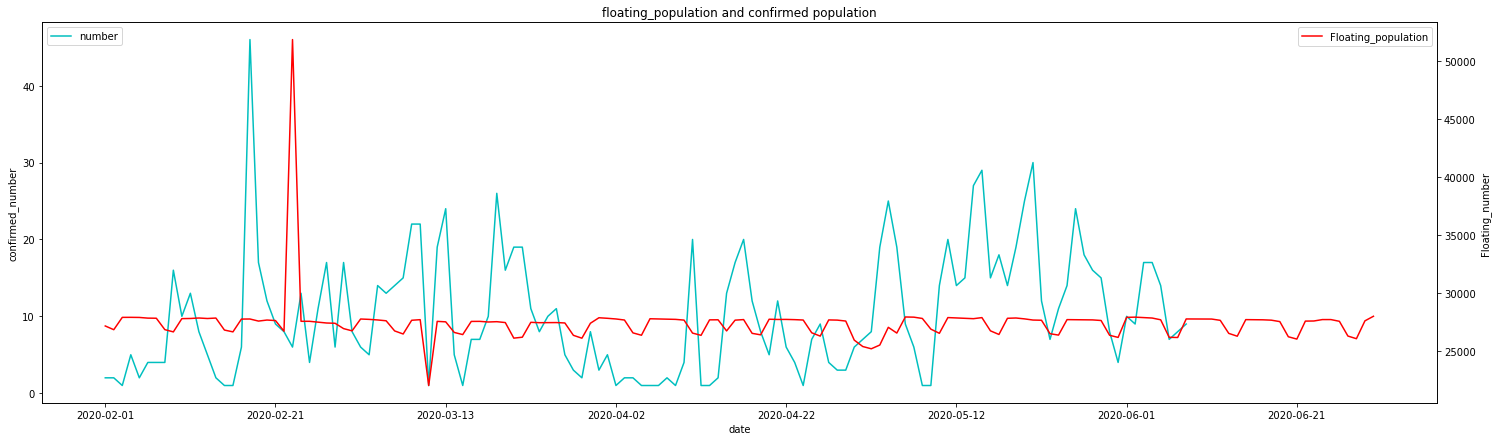

In [33]:
#유동인구와 코로나누적확진자 그래프-> 누적확진자의 가시성이 떨어진다는 임다은 학생의 피드백을 받아 일별 확진자수로 나타냄.
daily_confirmed2 = sum_confirmed.groupby('date')[['number']].count()
fig, axes = plt.subplots(1,1, figsize= (25, 7))
daily_confirmed2.plot(ax= axes,kind='line',color ='c', label = 'confirmed_number')
axes01 = axes.twinx()
seoul_floating.plot(ax= axes01, kind = 'line', color = 'r', label= 'Floating_number')
axes.set_title('floating_population and confirmed population')
axes.set_ylabel('confirmed_number')
axes01.set_ylabel('Floating_number')
axes.legend(loc='upper left')
plt.show()

## 분석결과(서울시내 코로나 누적확진자수와 서울시내 유동인구수)

서울시내 코로나 누적확진자수와 서울시내 유동인구수를 분석했습니다.
코로나 누적확진자수가 증가할수록 사회적거리두기 강화로 유동인구가 감소할 것이라고 예상했습니다.
하지만, 분석결과 일시적으로 2월에 큰폭의 증가, 3월의 큰폭의 감소가 있었지만, 대체적으로 서울시내 유동인구의 변화는 크지 않았습니다.
따라서, 코로나확진자수의 증가는 정부의 사회적거리두기 강화에도 불구하고, 서울시내 유동인구의 큰 영향을 주지 못한것으로 생각됩니다.

In [37]:
#policy 파일
policy.head(5)

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [38]:
#사회적거리두기 기준 데이터프레임
social_dis=policy.set_index('gov_policy').loc['Social Distancing Campaign']
social_dis

,policy_id,country,type,detail,start_date,end_date
gov_policy,,,,,,
Social Distancing Campaign,29,Korea,Social,Strong,2020-02-29,2020-03-21
Social Distancing Campaign,30,Korea,Social,Strong,2020-03-22,2020-04-19
Social Distancing Campaign,31,Korea,Social,Weak,2020-04-20,2020-05-05
Social Distancing Campaign,32,Korea,Social,Weak(1st),2020-05-06,NaN


In [39]:
#policy파일에서 gov_policy detail start_date만을 칼럼 데이터프레임
soc=social_dis.drop(['policy_id', 'country', 'type','end_date'], axis=1).reset_index()

In [40]:
soc1=soc.drop('gov_policy', axis=1)
soc2=soc1['start_date'].to_list()
soc2[0]

'2020-02-29'

In [41]:
#day기준 index 세기위한 데이터프레임(유동인구)
sf=seoul_floating.reset_index().reset_index().set_index('day')

sf.loc[soc2[0]]['index']

28.0

In [42]:
#일별 확진자수(누적X)
daily_confirmed2 = sum_confirmed.groupby('date')[['number']].count()
daily_confirmed2.head()

,number
date,
2020-02-16,2
2020-02-19,2
2020-02-2-,1
2020-02-20,5
2020-02-21,2


## 사회적거리두기 정책기반 서울시내 일별 확진자수, 유동인구 분석 그래프 

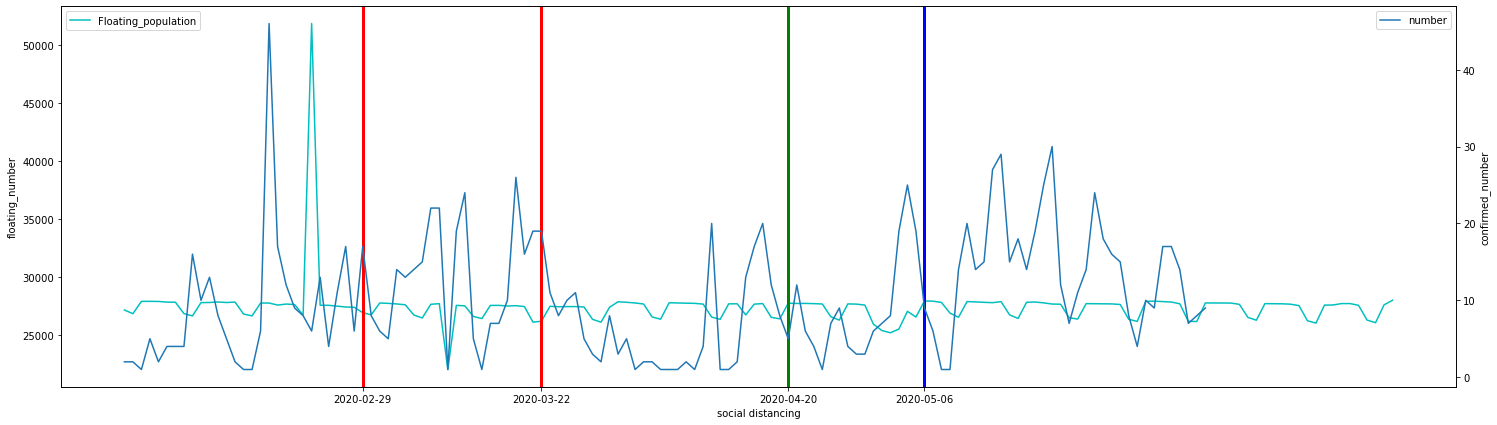

In [43]:
fig, axes = plt.subplots(1,1, figsize= (25, 7))
seoul_floating.plot(ax= axes,kind='line',color ='c', label = 'floating_number')
axes.set_ylabel('floating_number')
axes01= axes.twinx()
daily_confirmed2.plot(ax=axes01, kind='line',label='confirmed_number')
axes01.set_ylabel('confirmed_number')
axes.legend(loc= 'upper left')
axes.axvline(x=sf.loc[soc2[0]]['index'] , color='r', linewidth=3, label = 'Strong')
axes.axvline(x=sf.loc[soc2[1]]['index'] , color='r', linewidth=3,label = 'Strong')
axes.axvline(x=sf.loc[soc2[2]]['index'] , color='g', linewidth=3,label = 'Weak')
axes.axvline(x=sf.loc[soc2[3]]['index'] , color='b', linewidth=3,label = 'Weak(1st)')

axes.set_xticks([sf.loc[soc2[0]]['index'],sf.loc[soc2[1]]['index'],sf.loc[soc2[2]]['index'],sf.loc[soc2[3]]['index']])
axes.set_xlabel('social distancing')
axes.set_xticklabels([soc2[0],soc2[1],soc2[2],soc2[3]])
plt.legend()

## 분석결과

사회적거리두기 정책 실행날짜를 기준으로 서울시내 일별 확진자수, 유동인구를 분석했습니다. 사회적거리두기 정책이 시행되었을때, 서울시내 일별 확진자수는 감소할 것이고, 유동인구도 줄어들 것이라고 예상했습니다.
분석 결과, 사회적거리두기이후 코로나 확진자수는 감소추세를 보임을 확인할 수 있었지만, 유동인구 변화는 대체로 없없습니다.
따라서, 사회적거리두기 정책은 코로나환자수를 일시적으로 감소시키는데 효과가 있는것으로 생각되지만, 서울시내 유동인구에는 크게 영향을 주지 않으며, 서울시내 유동인구가 코로나환자수에 큰 영향을 주지 않는 것으로 파악됩니다.
(조원들의 관심사는 확진자수 증가에 연이은 유동인구수 폭증에 있었음. 그에 대한 가설로 다양한 의견이 제시되었지만, 합당한 의견을 찾을 순 없었음.)
임다은-밴드공연이 개최되었었다. 꽤나 메이저 밴드였기에 나타난 현상이다. 하지만 단순한 공연으로 인해 생긴 유동인구수라고 하기에는 증가량이 전날 대비 10배였기에 합당하지 않았음.
안서영-곧 있을 공휴일 혹은 3월 1일을 대비한 이동이 아니었을까? 정치적인 이동(시위) 등도 의심해보아야 한다. 하지만, 3월 1일 당일에는 유동인구수가 높지 않았던 점, 그리고 무엇보다도 대규모의 인구이동이 있었을 법한 사건이 없었음.

## 결론

서울시내를 기준으로 유동인구수와 코로나확진환자수 사이의 상관관계는 거의 없는것으로 분석되며, 정부의 사회적거리두기는 일시적으로 코로나 확진환자수 감소를 보이는 것으로 보아 실효성이 있는것으로 분석됩니다. 
(조원들과의 의견을 나눠본 결과, 교수님께서 지적하셨던 일시적 확진자수 감소의 효용성에 대해 다시 한 번 생각해보게 되었습니다. 만일 지속적으로 거리두기정책을 강화했다면, 분명히 확진자수는 큰 폭으로 감소했을 것이나, 거리두기가 지속되었을 때 경제, 사회적 관점에서의 피해가 지속되기 때문에 거리두기 정책을 지속적으로 강화할 수 없을 것 같습니다.)

## 특이사항

서울시내 유동인구수 데이터 분석결과, 
2020년 2월 23일에 유동인구수의 갑작스러운 급등이 관찰되었습니다.
특히, 송파구의 유동인구수가 10만명 가량으로 가장많은것으로 확인되었습니다.
(위 데이터의 특이점을 해소하기 위해 안서영학생과 많은 자료들을 검토했지만, 특이점의 원인을 알아낼 수 없었습니다.)

참고자료
https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description
https://www.bigdatahub.co.kr/index.do